## Image processing with openCV.

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

#### Задача 1
Переведите изображение **Печать.jpg** в цветовое пространство HSV, CIELab или YCbCr. Подберите пороги для нужных осей, чтобы получить изображение синей печати отдельно от чёрного текста. Переведите полученное изображение обратно в RGB и отобразите результат. 

##### HSV

In [2]:
path = "Печать.jpg"
f = open(path, "rb")
chunk = f.read()
chunk_arr = np.frombuffer(chunk, dtype=np.uint8)
img_bgr = cv2.imdecode(chunk_arr, cv2.IMREAD_COLOR) # -> BGR
img_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # -> RGB
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) # -> hsv

In [3]:
def rendering_img(img: np.array, name: str, position: int):
    '''
    Вывод изображения с заголовком,
    без осей координат
    '''
    axarr[position].imshow(img)
    axarr[position].set_title(name)
    axarr[position].xaxis.set_visible(False)
    axarr[position].yaxis.set_visible(False)

<Figure size 640x480 with 0 Axes>

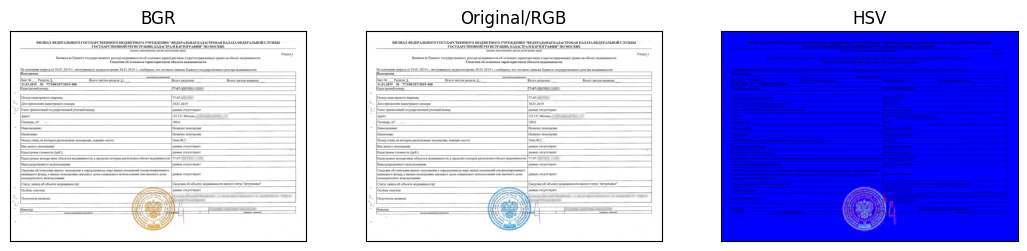

In [4]:
plt.figure()

f, axarr = plt.subplots(1,3, figsize=(13, 15))
rendering_img(img_bgr, 'BGR', 0)
rendering_img(img_original, 'Original/RGB', 1)
rendering_img(img_hsv, 'HSV', 2)

plt.show()

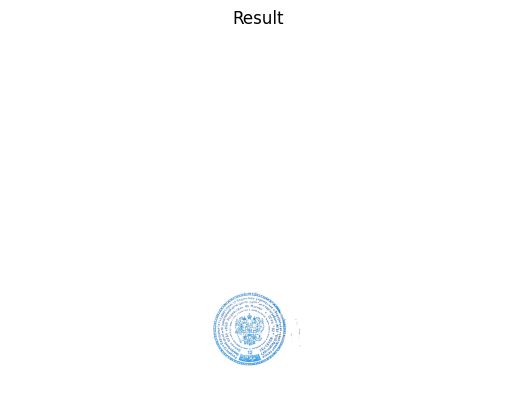

In [5]:
lower_blue = np.array([0,80,50])
upper_blue = np.array([120,255,255])
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

res = cv2.bitwise_and(img_original,img_original, mask=mask)
res[res == 0] = 255

plt.imshow(res)
plt.title('Result')
plt.axis('off')
plt.show()

##### Вывод:

Получены значения маски для извлечения печати.

#### Задача 2
Переведите изображение **Книга.jpg** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

In [6]:
path = "Книга.jpg"
f = open(path, "rb")
book = f.read()
book_arr = np.frombuffer(book, dtype=np.uint8)
book_arr_bgr = cv2.imdecode(book_arr, 0) # -> BGR
book_arr = cv2.cvtColor(book_arr_bgr, cv2.COLOR_BGR2RGB) # -> RGB

##### Normalize

In [7]:
#implementation
book_arr_normalize = (book_arr - book_arr.min()) * (255 / (book_arr.max() - book_arr.min()))
book_arr_normalize = np.uint8(book_arr_normalize)

In [8]:
book_arr_normalize_func = cv2.normalize(book_arr, None, 0, 255, cv2.NORM_MINMAX)

##### Gamma

In [9]:
book_arr_gamma = 3.5 * (book_arr ** 0.81)
book_arr_gamma = np.uint8(book_arr_gamma)

<Figure size 640x480 with 0 Axes>

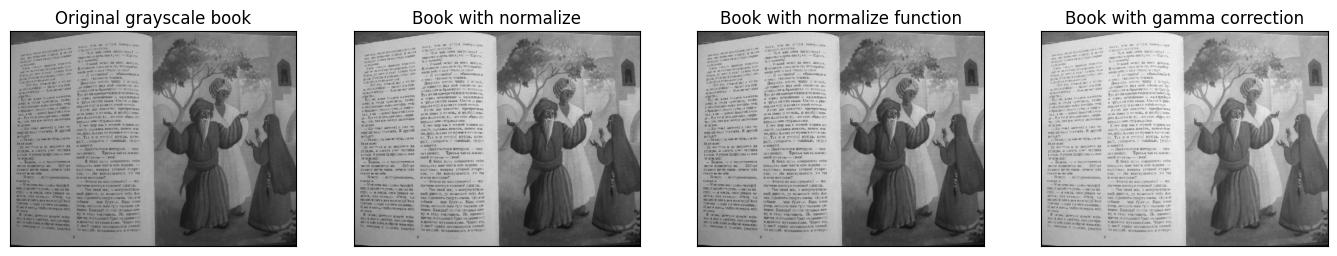

In [10]:
plt.figure()

f, axarr = plt.subplots(1,4, figsize=(17, 15))
rendering_img(
    book_arr,
    'Original grayscale book',
    0
)
rendering_img(
    book_arr_normalize,
    'Book with normalize',
    1
)
rendering_img(
    book_arr_gamma,
    'Book with gamma correction',
    3
)
rendering_img(
    book_arr_normalize_func,
    'Book with normalize function',
    2
)

plt.show()

##### Эквализация гистограммы (𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡)

In [11]:
book_equ = cv2.equalizeHist(book_arr_bgr)
book_equ_gray = cv2.cvtColor(book_equ, cv2.COLOR_BGR2RGB)

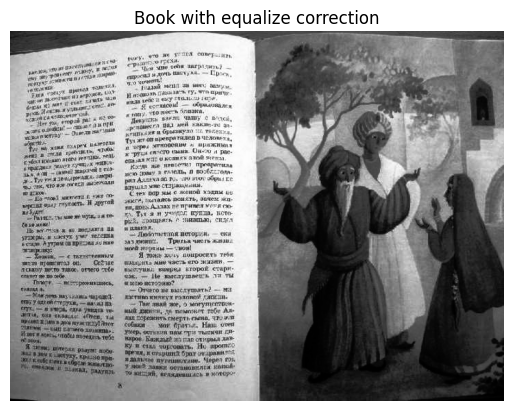

In [12]:
plt.imshow(book_equ_gray)
plt.title('Book with equalize correction')
plt.axis('off')
plt.show()

##### result

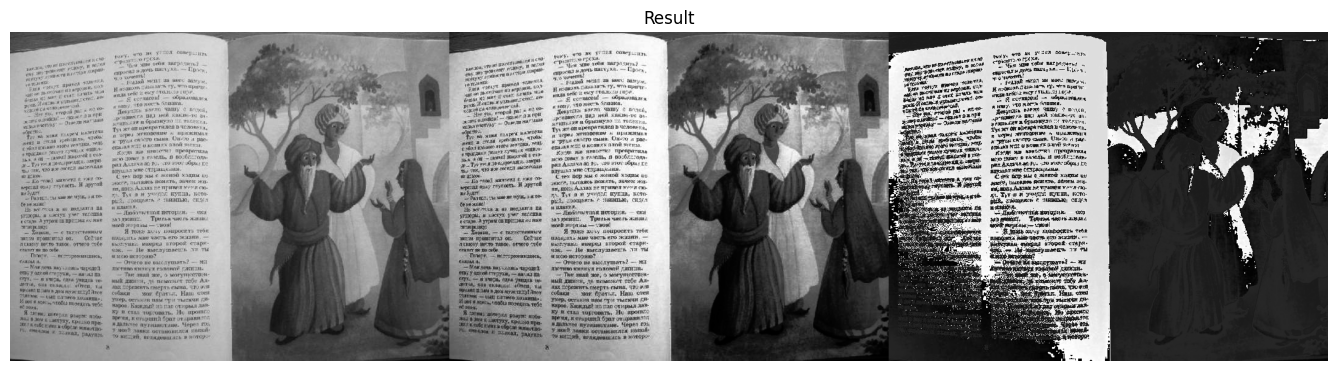

In [13]:
img_result = np.hstack([book_arr_normalize_func, book_equ_gray, book_arr_normalize_func - book_equ_gray])
plt.figure(figsize=(17,15))
plt.imshow(img_result)
plt.title('Result')
plt.axis('off')
plt.show()

##### Вывод:
Проведена коррекция изображений, лучший результат получился с помощью эквализации гистограммы. Фон текста стал более белым, при этом изображений сохранило свои темные оттенки.

#### Задача 3
Выберите по два произвольных знаяения для каждого параметра гамма-коррекции ($\Gamma = ..$, $c = ..$). Получится 4 различных комбинации. Примените гамма-преобразование изображения **Книга.jpg** для каждой комбинации параметров. Отобразите исходное изображение **Книга.jpg** и его гамма-преобразования.

<Figure size 640x480 with 0 Axes>

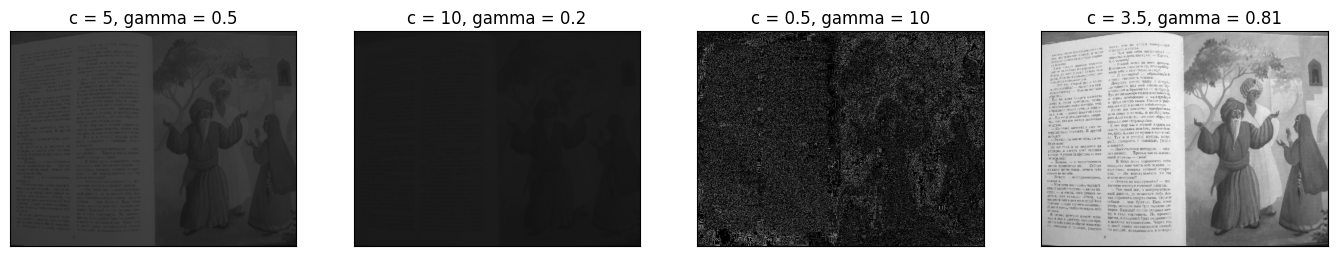

In [14]:
gamma_k = [
    [5, 0.5],
    [10, 0.2],
    [0.5, 10],
    [3.5, 0.81]
]

plt.figure()

f, axarr = plt.subplots(1,4, figsize=(17, 15))

for i, k in enumerate(gamma_k):
    book_arr_gamma = k[0] * (book_arr ** k[1])
    book_arr_gamma = np.uint8(book_arr_gamma)
    
    rendering_img(
            book_arr_gamma,
            f'c = {k[0]}, gamma = {k[1]}',
            i
        )
   

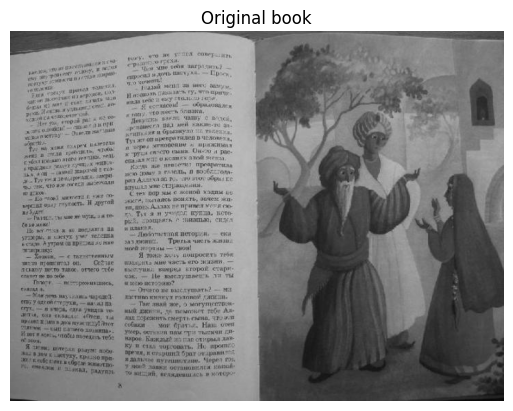

In [15]:
plt.imshow(book_arr)
plt.title('Original book')
plt.axis('off')
plt.show()

##### Вывод:
Гамма корекцию уже провел во втором задании, поэтому были подобраны приемлемые коэффициенты "С" и "Gamma", для цветокоррекции.
С увеличением Гамма изображение становится сильно зашумленным, при высоком коэффициенте С изображение становится темным.

#### Задача 4

Загрузите изображение **Лена.jpg**. Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображения (4 параметра фильтров х 2 типа фильтров).

In [16]:
D = [5, 15, 30, 255] # радиус

In [17]:
# открыаем изображение в градациях серого
img = cv2.imread('lena.jpg', 0)

In [18]:
def prepare_image(img: np.array) -> np.array:
    '''
    Подготовка изображения к выводу на экран
    '''
    img_normalize = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    
    return cv2.cvtColor(img_normalize, cv2.COLOR_BGR2RGB)

In [19]:
def prepare_spectrum(spectrum: np.array) -> np.array:
    '''
    Подготовка Фурье-спектра после фильтрации 
    '''
    mag = np.linalg.norm(spectrum, axis=2)
    mag /= mag.max()
    mag **= 1/100
    
    mag = cv2.cvtColor(mag, cv2.COLOR_BGR2RGB)
    mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    
    return mag

In [20]:
def img_filter(img: np.array, type_filter: str, r: int) -> np.array:

    np.seterr(divide = 'ignore')
    
    img_float32 = np.float32(img)

    # вычисляем дискретное преобразование Фурье изображения
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # cдвигаем компоненту нулевой частоты преобразования Фурье к центру массива
    dft_shift = np.fft.fftshift(dft)
    # Фурье-спектр после логарифмической коррекции
    magnitude_spectrum_orig = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    magnitude_spectrum_orig = prepare_image(magnitude_spectrum_orig)
    
    rows, cols = img.shape
    crow, ccol = rows//2 , cols//2     # center

    # создание маски фильтра НЧ исходя из заданного радиуса
    mask = np.zeros((rows, cols, 2), np.uint8)
    
    if type_filter == 'LF':
        mask[crow-r:crow+r, ccol-r:ccol+r] = 1 #маска НЧ
        
    elif type_filter == 'HF':
        mask = np.ones((rows, cols, 2), np.uint8)
        mask[crow-r:crow+r, ccol-r:ccol+r] = 0 #ВЧ
    
    # Применяем маску к дискретному преобразованияю Фурье
    fshift = dft_shift*mask
        
    #инверсия
    f_ishift = np.fft.ifftshift(fshift)
    #Фурье-спектр после фильтрации
    magnitude_spectrum_filtered = prepare_spectrum(f_ishift)
    
    # обратное преобразование
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    
    # нормализация
    img_normalize = prepare_image(img_back)
    
    #нормализация оригинального изображения для конкатенации
    img = prepare_image(img)
    
    img_result = np.hstack(
        [img,
         magnitude_spectrum_orig,
         magnitude_spectrum_filtered,
         img_normalize
         ]
    )
    
    return img_result

In [21]:
def dict_img_fil(img: np.array, type_filter: str, D: list) -> dict:
    '''
    Возвращает словарь:
    ключ - радиус фильтра
    значение - состеканные изображения фильтров
               и исходных изображений
    '''
    dict_filter = {}
    
    for r in D:
        dict_filter[r] = img_filter(img, type_filter, r)
        
    return dict_filter

In [22]:
def rendering_subplot(type_filter: str, dict_img: dict, D: list):
    f, axarr = plt.subplots(4,1, figsize=(13, 15))
    f.suptitle(f"Applcation {type_filter} filters with different radius", fontsize=16)
    for i, r in enumerate(D):
        rendering_img(dict_img[r], f'R_filter = {r}', i)

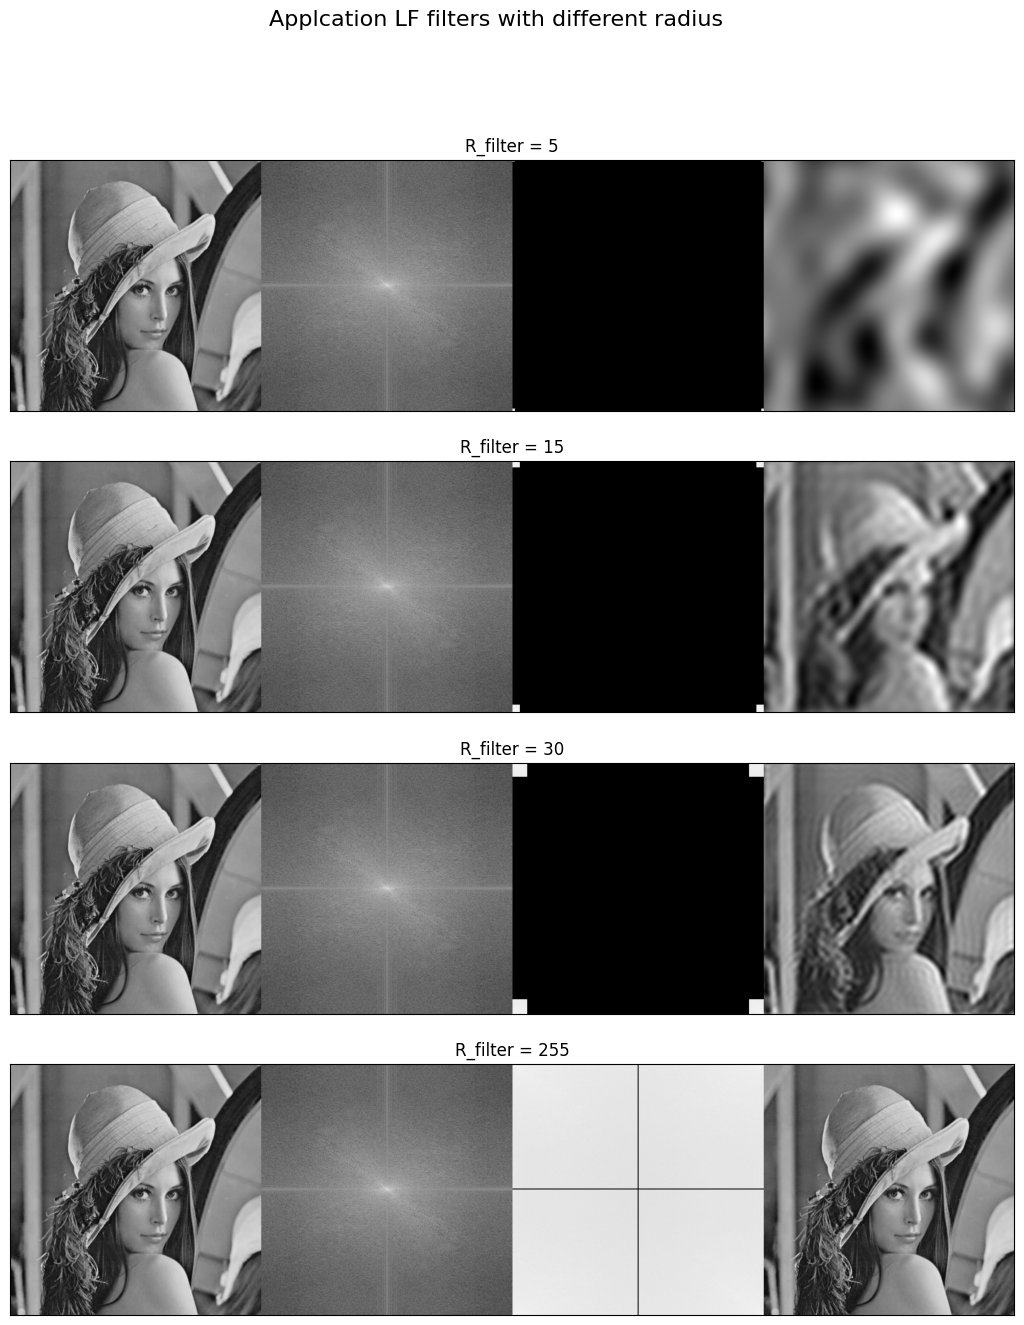

In [23]:
# Фильтр НЧ
type_filter = 'LF'
lf_filter = dict_img_fil(img, type_filter, D)

f, axarr = plt.subplots(4,1, figsize=(13, 15))
f.suptitle(f"Applcation {type_filter} filters with different radius", fontsize=16)
for i, r in enumerate(D):
    rendering_img(lf_filter[r], f'R_filter = {r}', i)

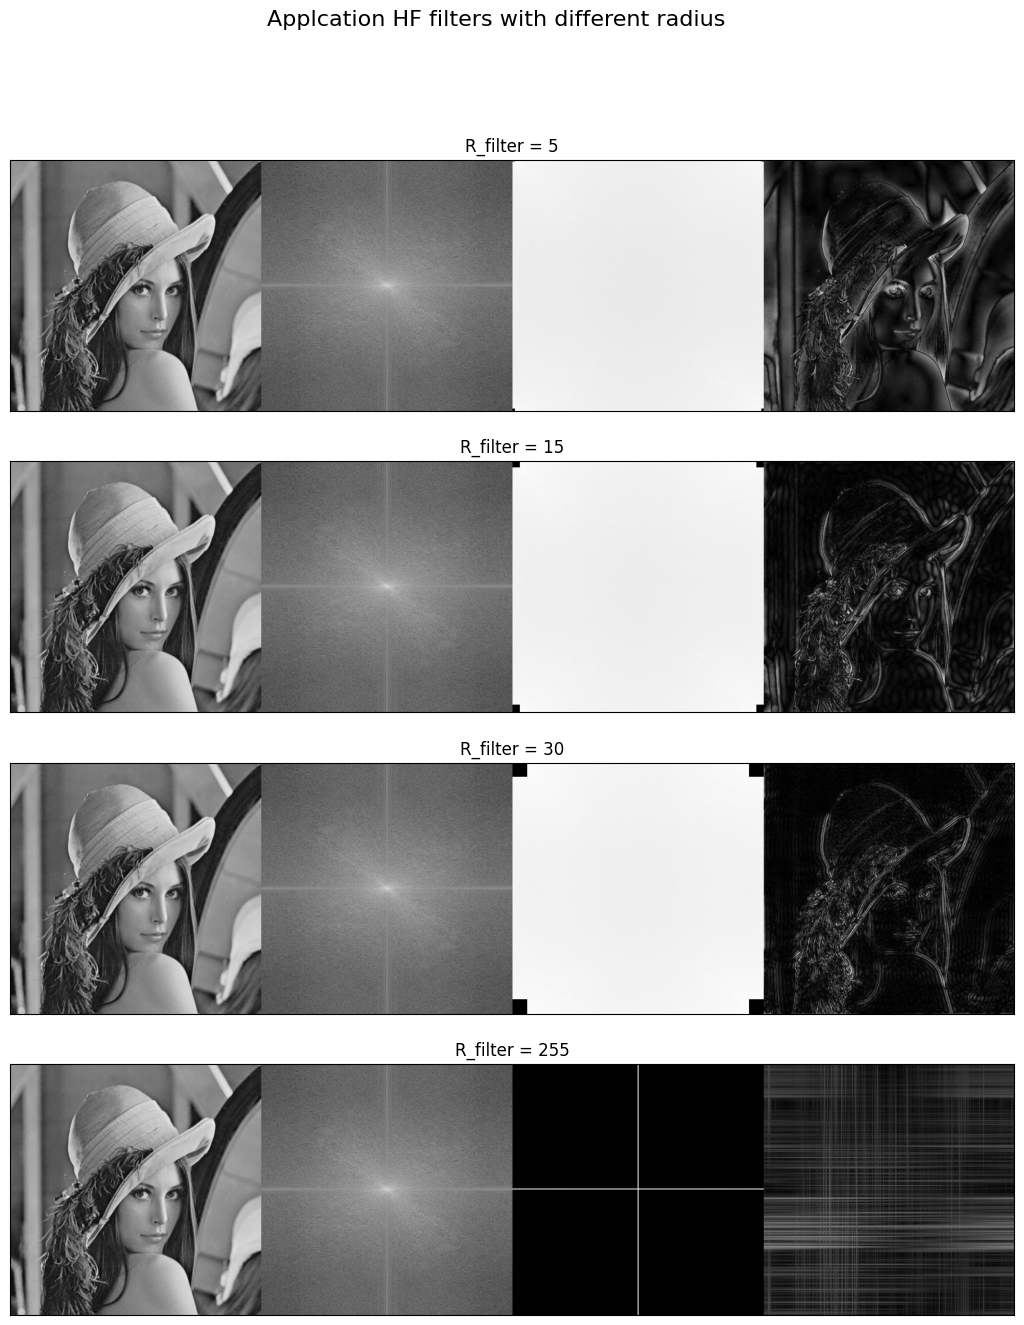

In [24]:
type_filter = 'HF'
hf_filter = dict_img_fil(img, type_filter, D)

f, axarr = plt.subplots(4,1, figsize=(13, 15))
f.suptitle(f"Applcation {type_filter} filters with different radius", fontsize=16)
for i, r in enumerate(D):
    rendering_img(hf_filter[r], f'R_filter = {r}', i)

##### Вывод:
При уменьшении радиуса фильтра низких частот - исходное изображение становится более размытым;
При увеличении радиуса фильтра высоких частот - исходное изображение становится более зашумленным.

#### Задача 5
Выделите в изображении **table.jpg** границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором присутствует текст и удалены все стороны таблицы.

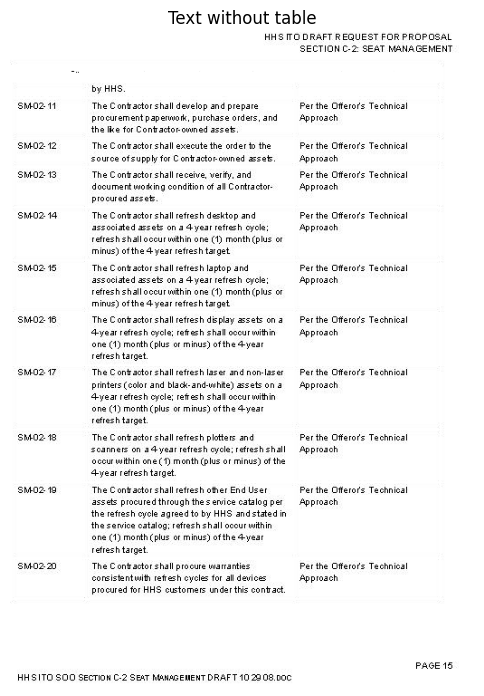

In [25]:
image = cv2.imread('table.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Детектируем горизонтальные линии
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
horizontal_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

# Детектируем вертикальные линии
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
vertical_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

# Комбинируем маски горизонтальных и вертикальных линий
table_mask = cv2.bitwise_or(horizontal_mask, vertical_mask)
# осветляем значения табличной маски
image[np.where(table_mask==255)] = [255,255,255]

plt.figure(figsize=(6,10))
plt.imshow(image)
plt.title('Text without table')
plt.axis('off')
plt.show()